In [39]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
data_path = 'data/'
images = 'images/'

droids_df = pd.read_csv(data_path + 'all.CSV', sep=',', encoding='utf8')
droids_df.columns = ['class','fileName','height','width','xmax','xmin','ymax','ymin']

In [41]:
droids_df

,class,fileName,height,width,xmax,xmin,ymax,ymin
0,bb8,BB-8_1,512,288,208,46,512,15
1,bb8,BB-8_2,432,634,401,196,425,143
2,bb8,BB-8_3,480,480,443,23,480,155
3,bb8,BB-8_4,480,480,480,18,479,1
4,bb8,BB-8_5,332,800,442,332,332,208
...,...,...,...,...,...,...,...,...
197,r2d2,R2-D2_97,306,656,318,198,284,47
198,r2d2,R2-D2_98,381,545,274,4,380,4
199,r2d2,R2-D2_99,617,1084,547,365,447,206
200,r2d2,R2-D2_100,383,900,436,240,382,212


In [42]:
files = list(set(droids_df['fileName'].values))
train, test, _, _ = train_test_split(files, files, test_size=0.3, random_state=6)

def is_train(fileName): return fileName in train

droids_df['is_train'] = droids_df.fileName.apply(is_train)

In [43]:
droids_df

,class,fileName,height,width,xmax,xmin,ymax,ymin,is_train
0,bb8,BB-8_1,512,288,208,46,512,15,True
1,bb8,BB-8_2,432,634,401,196,425,143,True
2,bb8,BB-8_3,480,480,443,23,480,155,True
3,bb8,BB-8_4,480,480,480,18,479,1,True
4,bb8,BB-8_5,332,800,442,332,332,208,True
...,...,...,...,...,...,...,...,...,...
197,r2d2,R2-D2_97,306,656,318,198,284,47,True
198,r2d2,R2-D2_98,381,545,274,4,380,4,False
199,r2d2,R2-D2_99,617,1084,547,365,447,206,True
200,r2d2,R2-D2_100,383,900,436,240,382,212,True


In [44]:
# droids_df.to_pickle(f'{data_path}photos.pkl') хз зачем надо, но пусть пока будет

In [45]:
def draw_shelf_photo(file):
    file_droids_df = droids_df.loc[droids_df['fileName'] == file]
    coordinates = file_droids_df[['xmin', 'ymin', 'xmax', 'ymax']].values
    im = cv2.imread(f'{images}{file}.jpg')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)    
    for xmin, ymin, xmax, ymax in coordinates:
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
    plt.imshow(im)

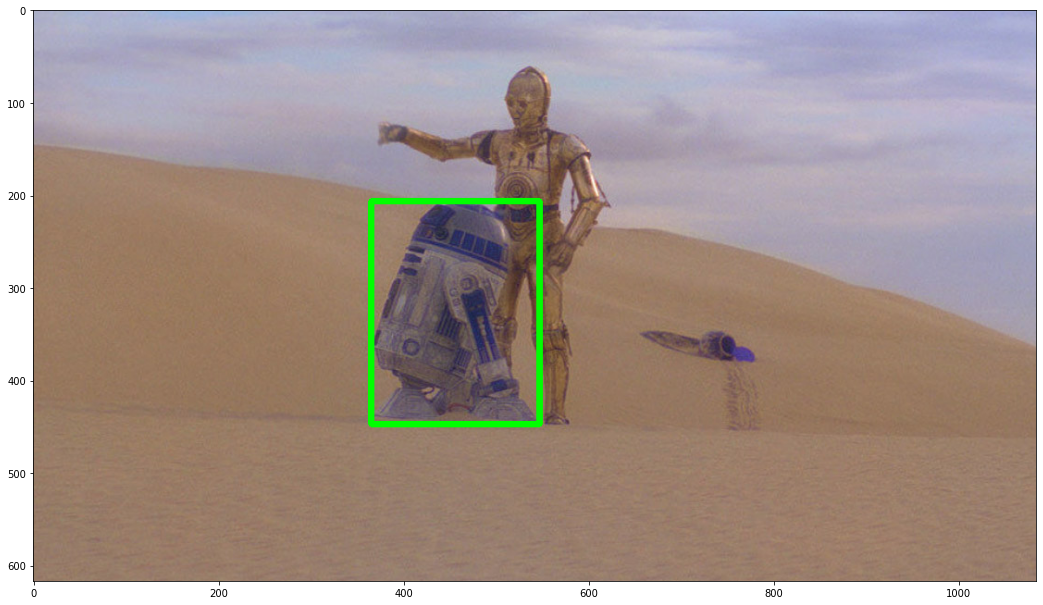

In [49]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('R2-D2_99')